Un notebook per visualizzare il funzionamento di SMOTE (Synthetic Minority Over-sampling Technique) per l'oversampling di classi sbilanciate.

In [6]:
from builtins import set

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

output_directory = '/home/marco/DataspellProjects/thesis/output/visualization/smote/'


palette = sns.color_palette(["#2176AB", "#F97662", "#FC9B31", "#FFBF00",  "#A8C43C", "#50C878", "#B284BE"])
sns.set(style="whitegrid", font_scale=1.5)
sns.set_palette(palette)
gradient_palette = sns.blend_palette(palette, 9)

# Creazione di un dataset sbilanciato
X, y = make_classification(n_classes=2, class_sep=2, weights=[0.2, 0.8], n_features=2,
                           n_informative=1, n_redundant=0, n_repeated=0, n_clusters_per_class=1,
                           n_samples=50, random_state=1)

#name variables as 'variabile 1' and 'variabile 2'
df = pd.DataFrame(X)
df['target'] = y
df.columns = ['variabile 1', 'variabile 2', 'target']
df['target'] = df['target'].map({0: 'classe 1', 1: 'classe 2'})
df.sort_values(by='target', inplace=True)

## Visualizzazione del dataset

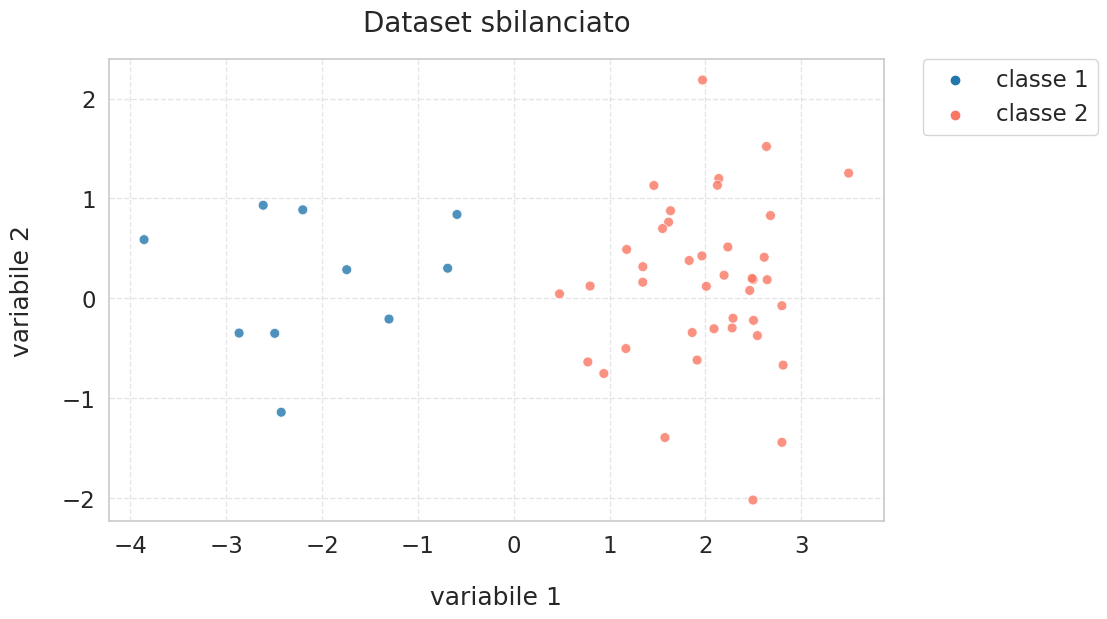

In [7]:

# Visualizzazione del dataset su scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['variabile 1'], y=df['variabile 2'], hue=df['target'], palette=palette[:2], s=50, alpha=0.8)
plt.legend(loc='upper right')
plt.grid( linestyle='--', alpha=0.5)
plt.title('Dataset sbilanciato', fontsize=20, pad=20)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('variabile 1', labelpad=20)
plt.ylabel('variabile 2', labelpad=20)
plt.savefig(output_directory + 'smote_unbalanced_dataset.png', bbox_inches='tight', dpi=300)

Plot dei knn e delle assi di sintesi

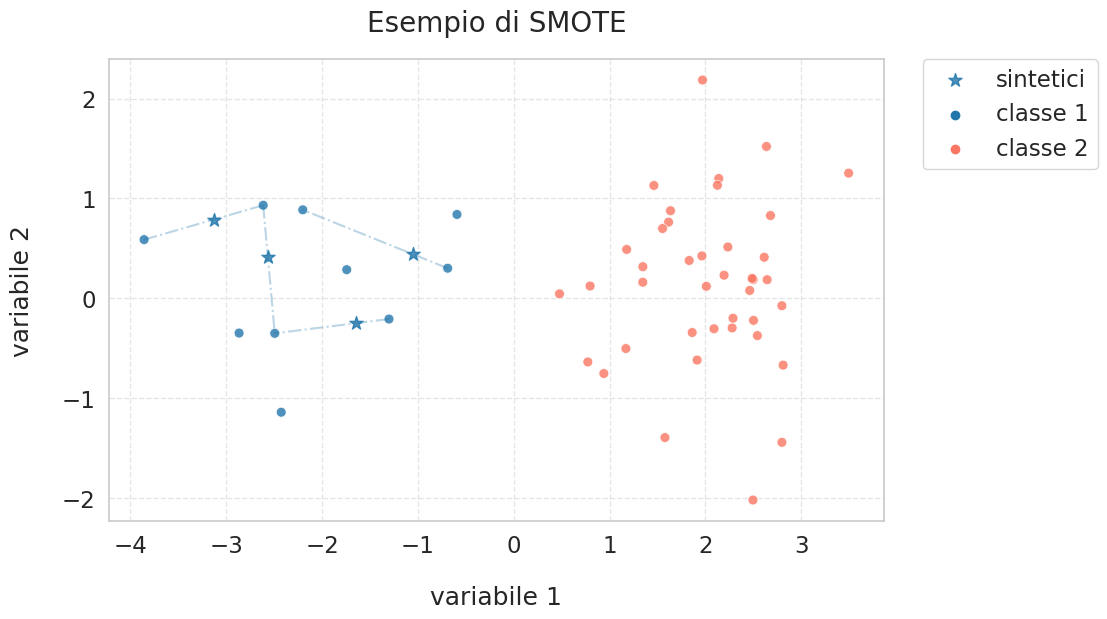

In [8]:

# Plot dei knn e delle assi di sintesi
plt.figure(figsize=(10, 6))

samples = [df[df['target'] == 'classe 1'].sample(2, random_state=i) for i in [3, 9, 30, 4]]
smote_samples = []

for i, sample in enumerate(samples):
    versor = (sample.iloc[1, :2] - sample.iloc[0, :2]) / np.linalg.norm(sample.iloc[1, :2] - sample.iloc[0, :2])
    noise = np.random.uniform(.3, .8)
    smote_sample = sample.iloc[0, :2] + versor * noise
    smote_samples.append(smote_sample)

    plt.plot([sample.iloc[0, 0], sample.iloc[1, 0]], [sample.iloc[0, 1], sample.iloc[1, 1]], '-.', color=palette[0], alpha=0.3)
    plt.scatter(smote_sample[0], smote_sample[1], color=palette[0], s=100, marker='*', alpha=0.8, label='sintetici' if i == 0 else None)

sns.scatterplot(x=df['variabile 1'], y=df['variabile 2'], hue=df['target'], palette=palette[:2], s=50, alpha=0.8)
#legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.grid( linestyle='--', alpha=0.5)
plt.title('Esempio di SMOTE', fontsize=20, pad=20)
plt.xlabel('variabile 1', labelpad=20)
plt.ylabel('variabile 2', labelpad=20)
plt.savefig(output_directory + 'smote_example.png', bbox_inches='tight', dpi=300)


## Applicazione di SMOTE

In [9]:

# SMOTE per l'oversampling
smote = SMOTE(sampling_strategy='auto', random_state=3)
X_resampled, y_resampled = smote.fit_resample(X, y)
df_resampled = pd.DataFrame(X_resampled)
df_resampled['target'] = y_resampled
df_resampled.columns = ['variabile 1', 'variabile 2', 'target']
df_resampled['target'] = df_resampled['target'].map({0: 'classe 1', 1: 'classe 2'})
df_resampled.sort_values(by='target', inplace=True)

## Visualizzazione del dataset oversampled

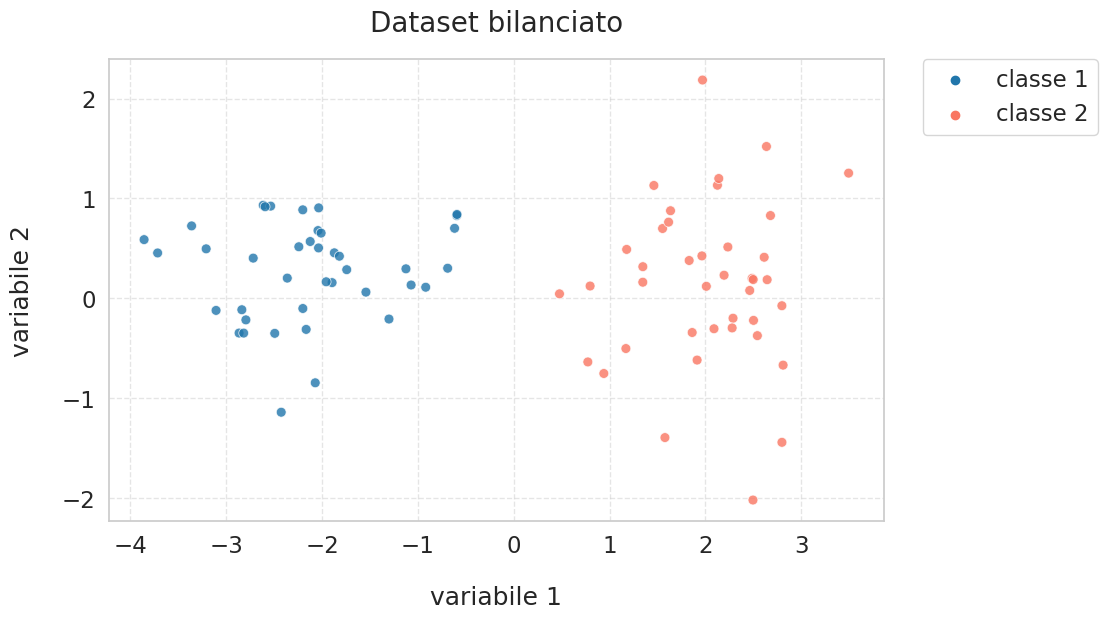

In [10]:
# Visualizzazione del dataset oversampled su scatterplot
plt.figure(figsize=(10, 6))
cls_1_size = df_resampled[df_resampled['target'] == 'classe 1'].shape[0]
cls_2_size = df_resampled[df_resampled['target'] == 'classe 2'].shape[0]
sns.scatterplot(x=df_resampled['variabile 1'], y=df_resampled['variabile 2'], hue=df_resampled['target'], palette=palette[:2], s=50, alpha=0.8)
plt.legend(loc='upper right', title='target')
plt.grid( linestyle='--', alpha=0.5)
plt.title('Dataset bilanciato', fontsize=20, pad=20)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('variabile 1', labelpad=20)
plt.ylabel('variabile 2', labelpad=20)
plt.savefig(output_directory + 'smote_balanced_dataset.png', bbox_inches='tight', dpi=300)